In [1]:
!pip install -q -r ../requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Initial Data Assessment

### Import Dependencies

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

Basic Information

In [3]:
df = pd.read_csv('../data/raw/Telco_Customer_Churn_Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
def check_missing(df):
    for col in df.select_dtypes(include=["object"]):  
        # Strip whitespace for string columns
        df[col] = df[col].str.strip()

        # Replace empty strings with NaN
        df[col] = df[col].replace("", np.nan)

    # Now count missing values
    missing_counts = df.isnull().sum()

    # Show only columns with missing values
    return missing_counts[missing_counts > 0]

# Example usage:
print(check_missing(df))

TotalCharges    11
dtype: int64


In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df = df.dropna(subset=["TotalCharges"])

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.shape

(7032, 21)

In [12]:
# check for duplicates
df.duplicated().sum()

0

In [13]:
# remove customerID column
df = df.drop(columns=['customerID'])

In [14]:
# change the datatype of TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Target Variable Analysis

### Calculate Churn Rate

In [16]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
No     5163
Yes    1869
Name: count, dtype: int64


Churn Rate: 26.58%


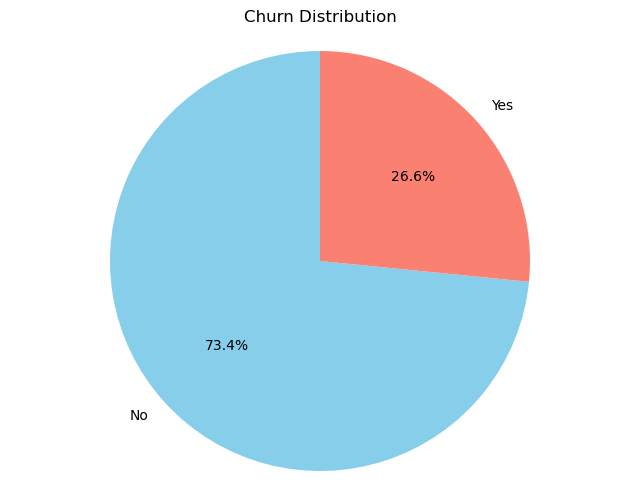

In [17]:
churn_rate = churn_counts['Yes'] / churn_counts.sum() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

### Feature Categorization

In [18]:
demographic_features = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents'
]

behavioral_features = [
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling'
]

financial_features = [
    'PaymentMethod',
    'MonthlyCharges',
    'TotalCharges'
]

target = ['Churn']

In [19]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

service_features = ['InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']

### Class Imbalanace Analysis

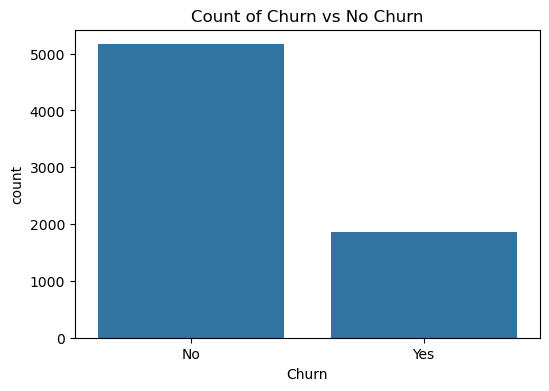

Imbalance Ratio (Majority : Minority) = 2.76 : 1

Business Context:
- Majority of customers belong to class 'No', minority to 'Yes'.
- Imbalance ratio of 2.76:1 shows data skew towards majority class.
- This impacts model training and requires attention (e.g., balancing techniques).



In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Count of Churn vs No Churn')
plt.show()

# Calculate imbalance ratio
churn_counts = df['Churn'].value_counts()
imbalance_ratio = churn_counts.max() / churn_counts.min()

print(f"Imbalance Ratio (Majority : Minority) = {imbalance_ratio:.2f} : 1")

# Business context explanation (write in your report/notes)
print("""
Business Context:
- Majority of customers belong to class '{}', minority to '{}'.
- Imbalance ratio of {:.2f}:1 shows data skew towards majority class.
- This impacts model training and requires attention (e.g., balancing techniques).
""".format(churn_counts.idxmax(), churn_counts.idxmin(), imbalance_ratio))


# Distribution

Categorical Features Analysis

Value counts for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64



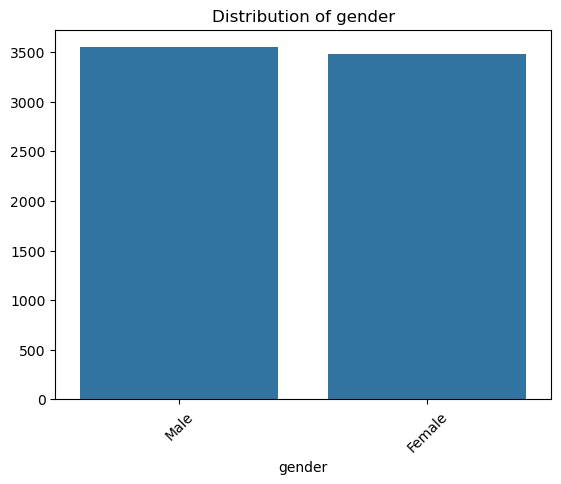


Value counts for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64



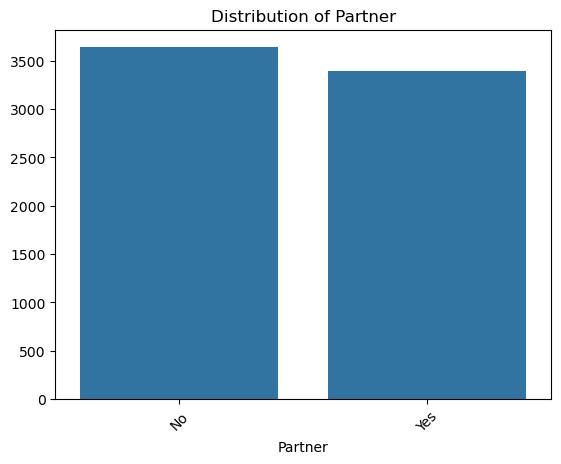


Value counts for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64



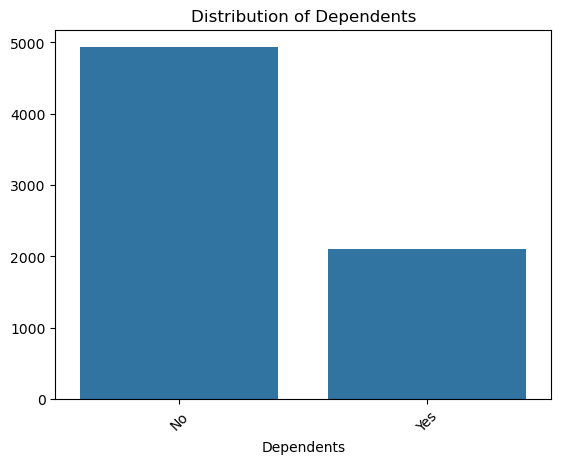


Value counts for PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64



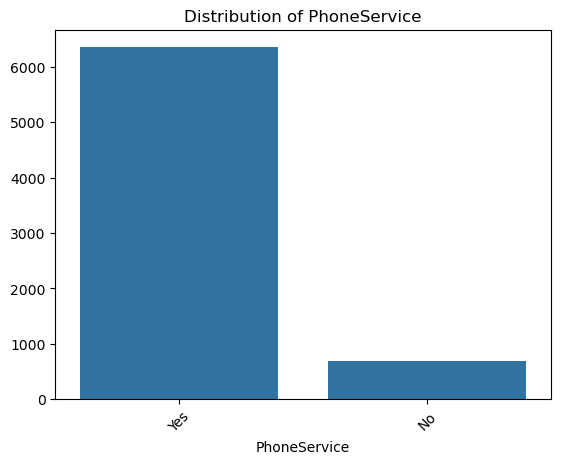


Value counts for MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64



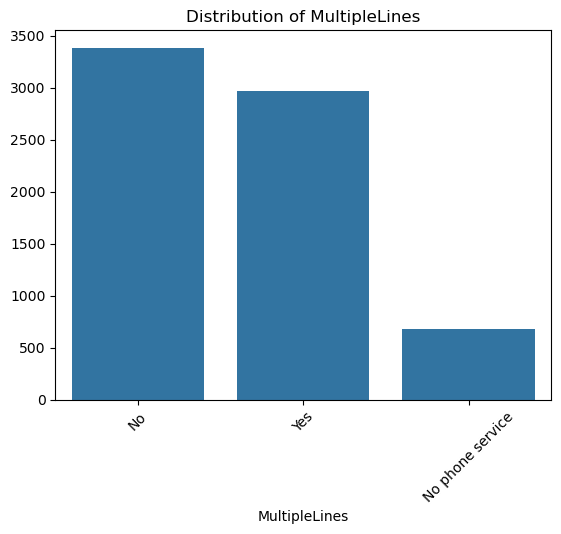


Value counts for InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64



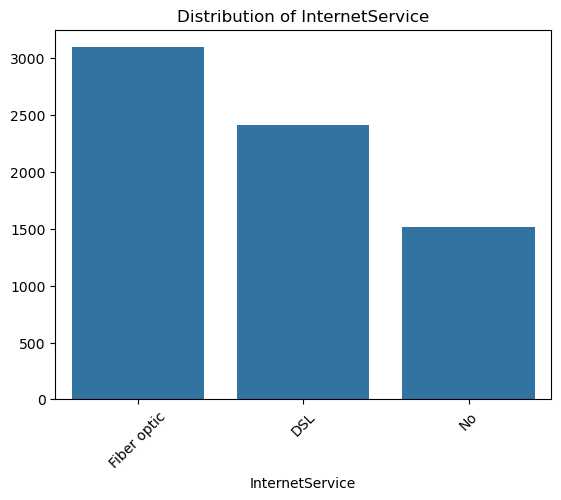


Value counts for OnlineSecurity:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64



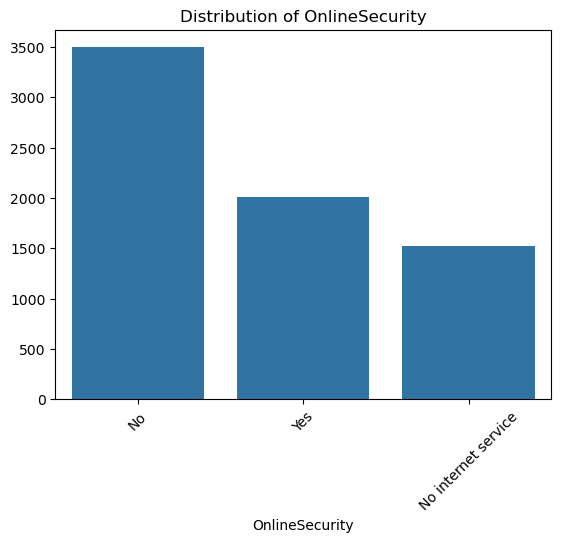


Value counts for OnlineBackup:
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64



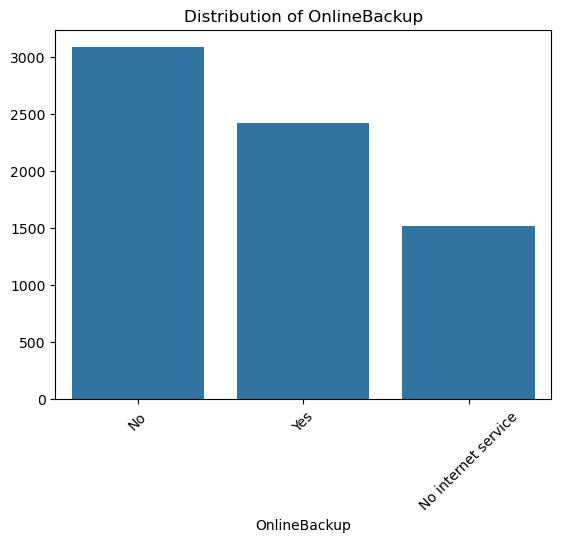


Value counts for DeviceProtection:
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64



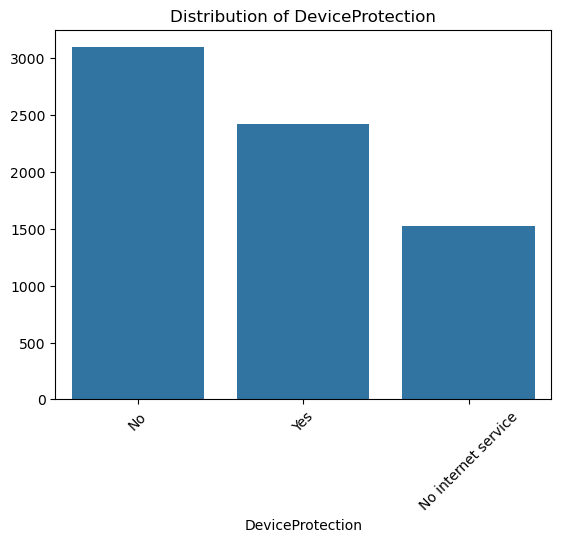


Value counts for TechSupport:
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64



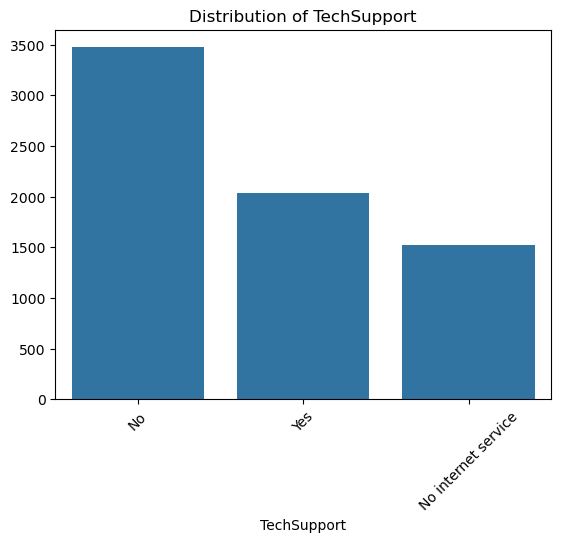


Value counts for StreamingTV:
StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64



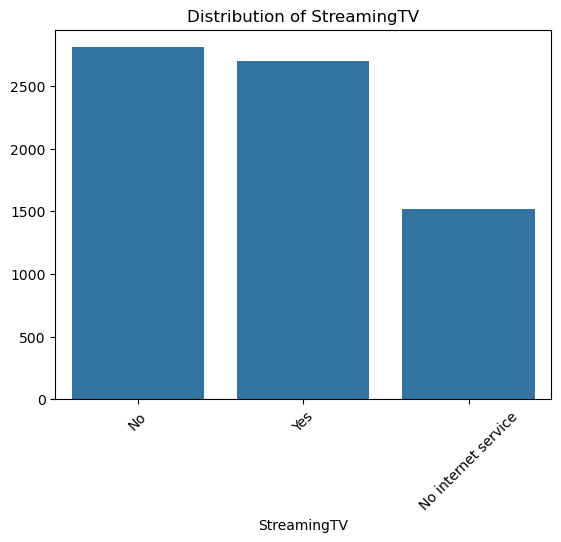


Value counts for StreamingMovies:
StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64



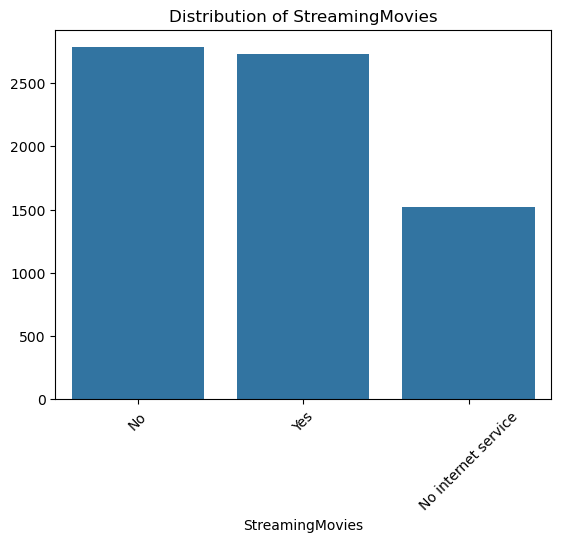


Value counts for Contract:
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64



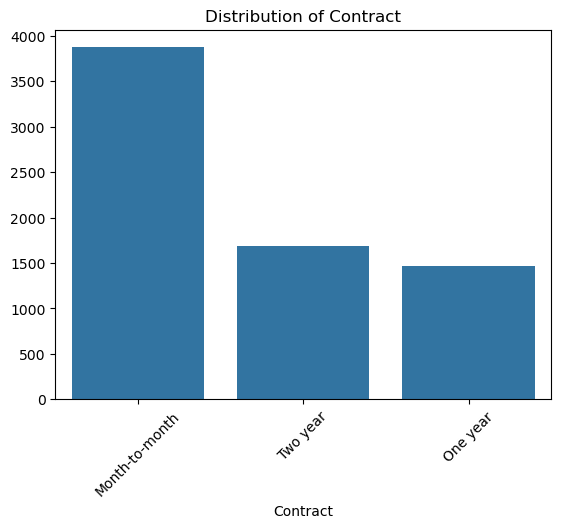


Value counts for PaperlessBilling:
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64



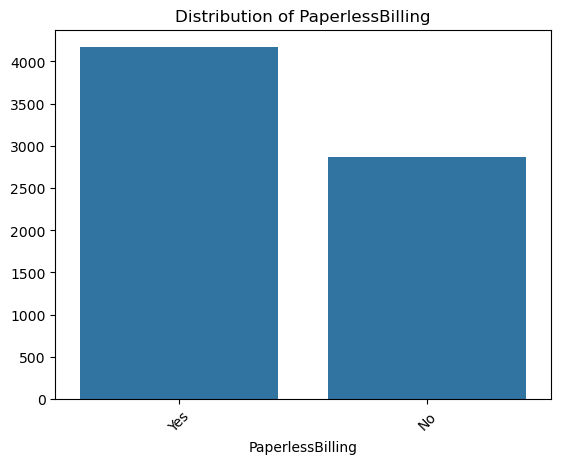


Value counts for PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64



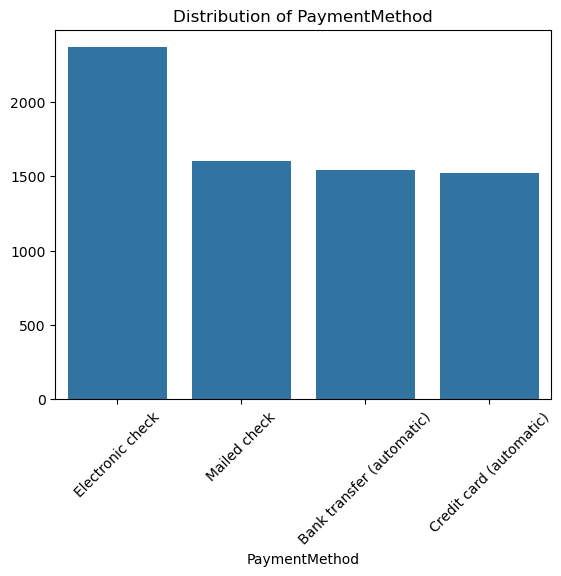


Value counts for Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64



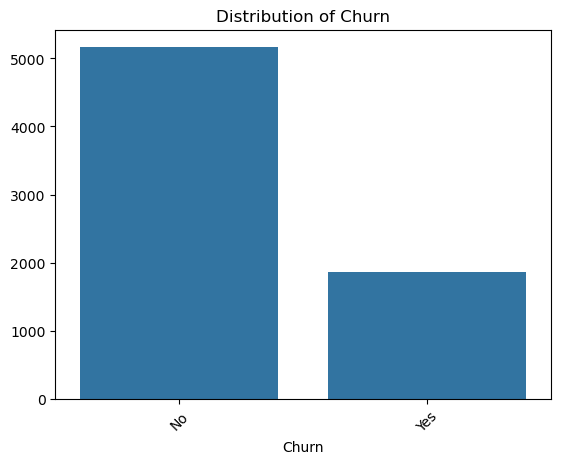

In [21]:
print("Categorical Features Analysis")
for column in df.select_dtypes(include=['object']).columns:
    value_counts = df[column].value_counts()
    print(f"\nValue counts for {column}:\n{value_counts}\n")
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

# Univariate Analysis

### Univariate Numerical Analysis

Numerical Features Analysis


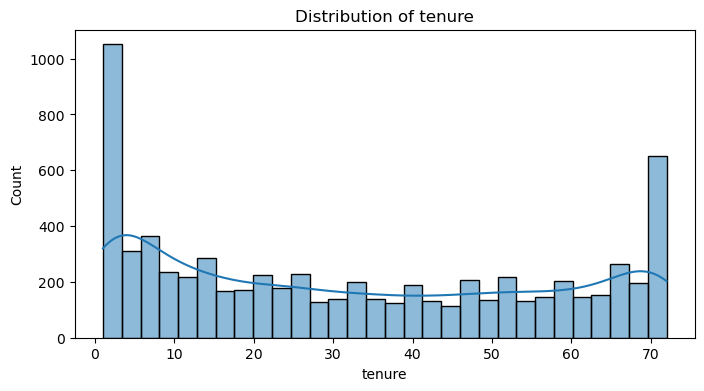

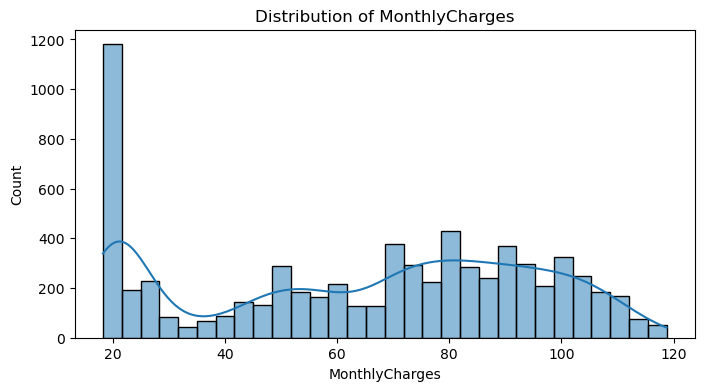

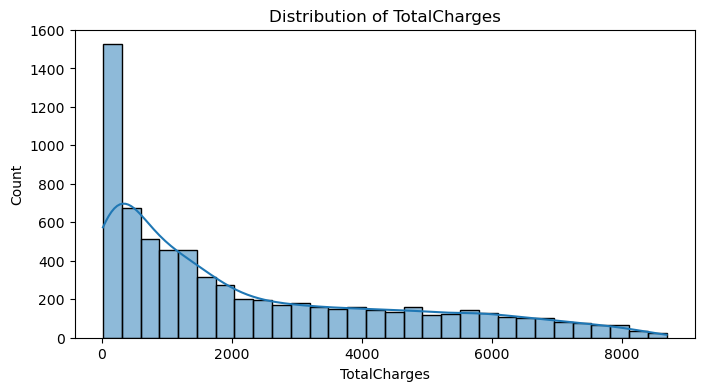

In [22]:
print("Numerical Features Analysis")
for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### Univariate Categorical Analysis


Categorical Features Frequency & Churn Relationship

Feature: gender
Value Counts:
gender
Male      3549
Female    3483
Name: count, dtype: int64

Churn Rate per Category:
Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046


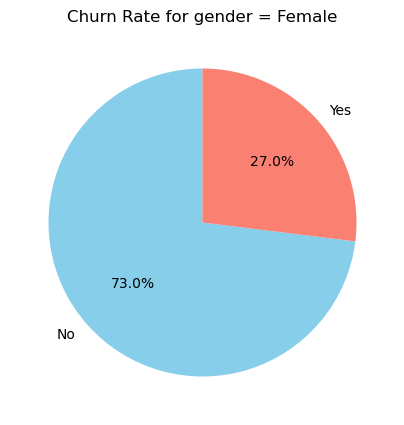

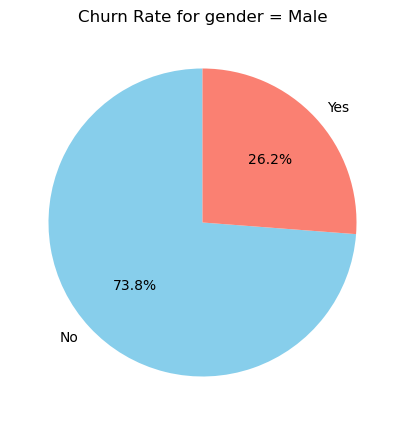


Feature: SeniorCitizen
Value Counts:
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Churn Rate per Category:
Churn                No       Yes
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813


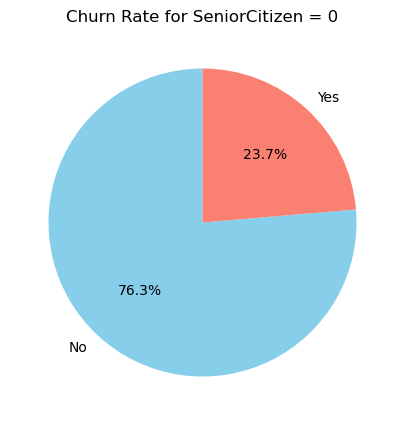

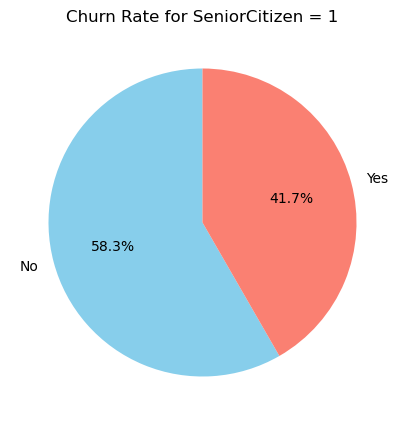


Feature: Partner
Value Counts:
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Churn Rate per Category:
Churn          No       Yes
Partner                    
No       0.670239  0.329761
Yes      0.802829  0.197171


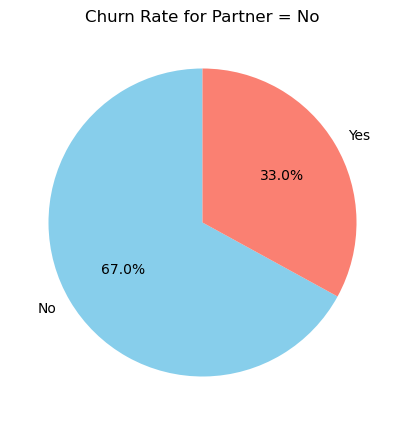

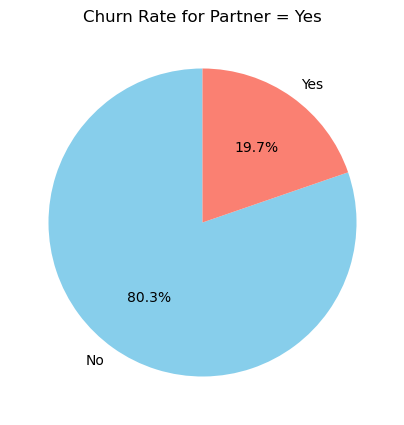


Feature: Dependents
Value Counts:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Churn Rate per Category:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.844688  0.155312


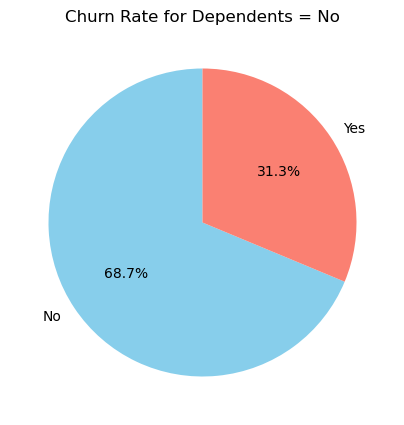

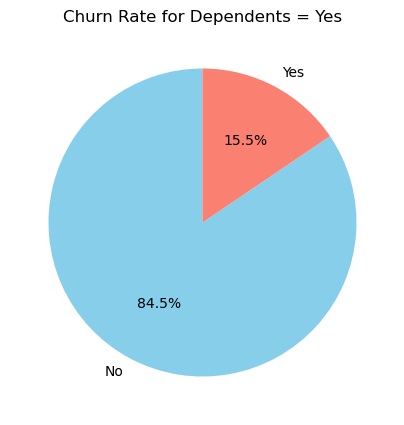


Feature: PhoneService
Value Counts:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Churn Rate per Category:
Churn               No       Yes
PhoneService                    
No            0.750000  0.250000
Yes           0.732525  0.267475


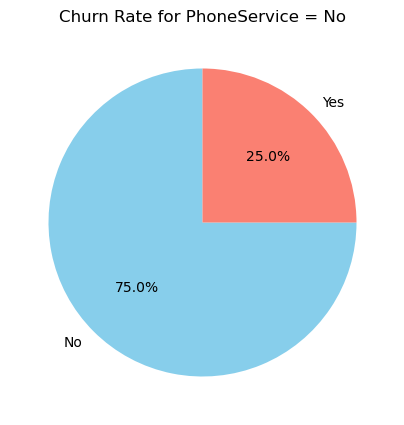

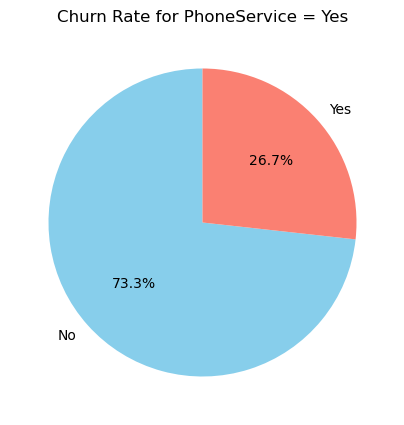


Feature: MultipleLines
Value Counts:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

Churn Rate per Category:
Churn                   No       Yes
MultipleLines                       
No                0.749188  0.250812
No phone service  0.750000  0.250000
Yes               0.713515  0.286485


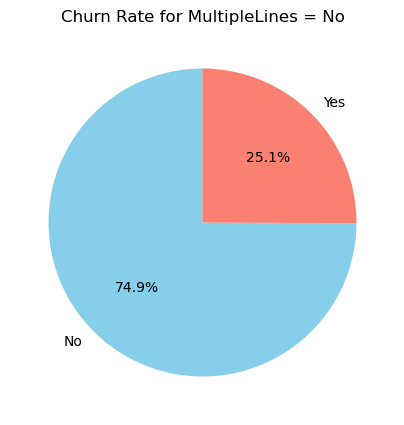

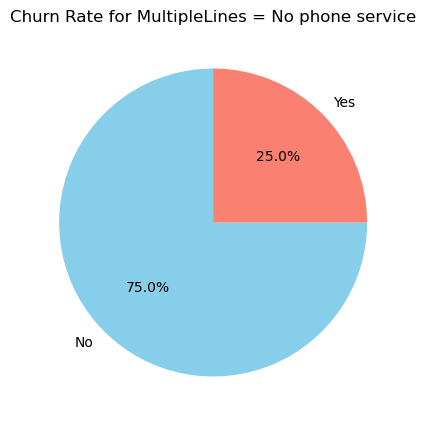

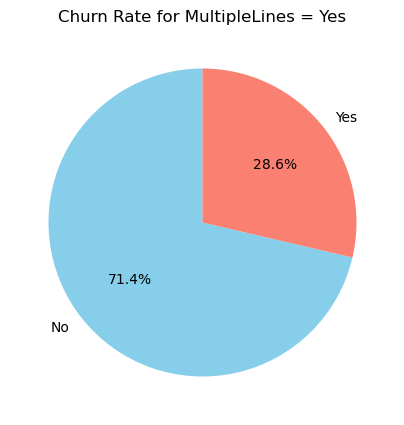


Feature: InternetService
Value Counts:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Churn Rate per Category:
Churn                  No       Yes
InternetService                    
DSL              0.810017  0.189983
Fiber optic      0.581072  0.418928
No               0.925658  0.074342


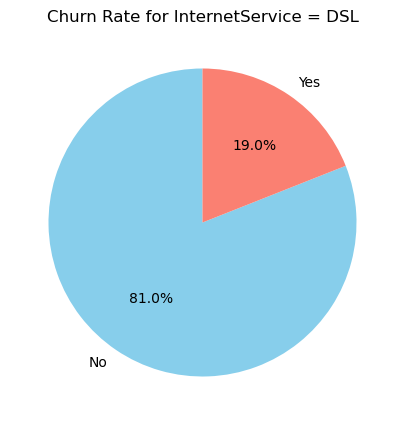

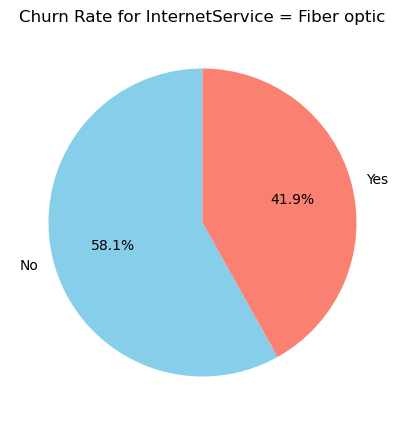

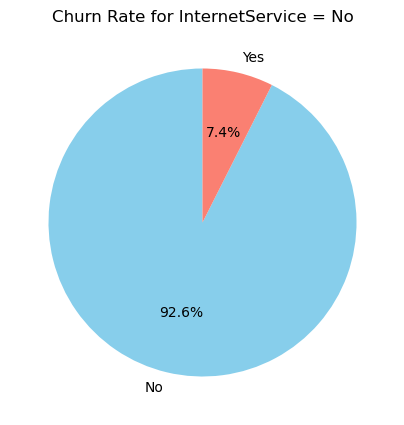


Feature: OnlineSecurity
Value Counts:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

Churn Rate per Category:
Churn                      No       Yes
OnlineSecurity                         
No                   0.582213  0.417787
No internet service  0.925658  0.074342
Yes                  0.853598  0.146402


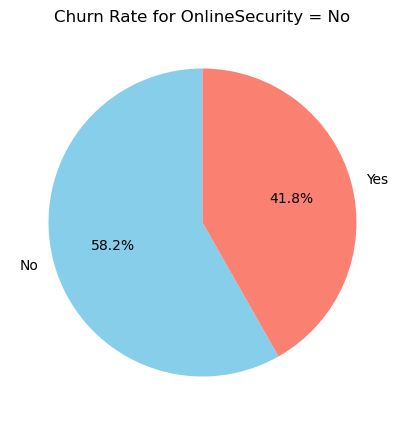

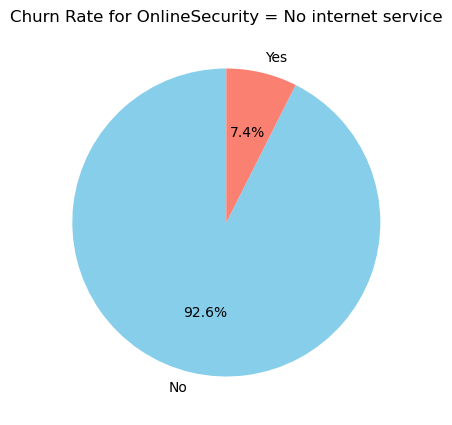

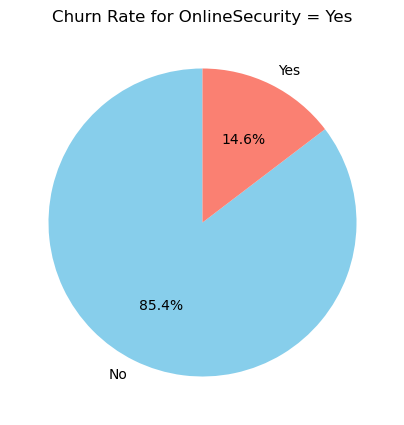


Feature: OnlineBackup
Value Counts:
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

Churn Rate per Category:
Churn                      No       Yes
OnlineBackup                           
No                   0.600583  0.399417
No internet service  0.925658  0.074342
Yes                  0.784330  0.215670


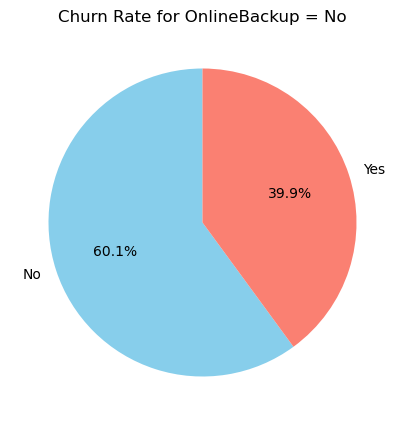

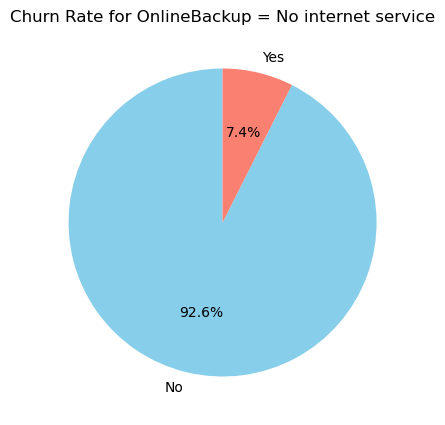

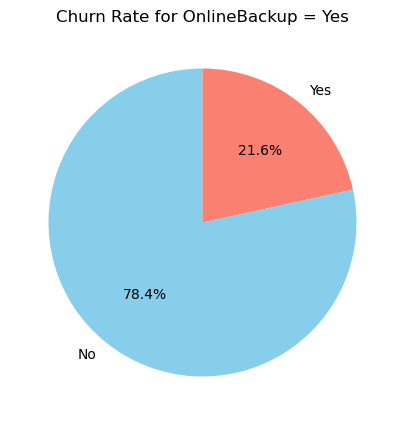


Feature: DeviceProtection
Value Counts:
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

Churn Rate per Category:
Churn                      No       Yes
DeviceProtection                       
No                   0.608597  0.391403
No internet service  0.925658  0.074342
Yes                  0.774607  0.225393


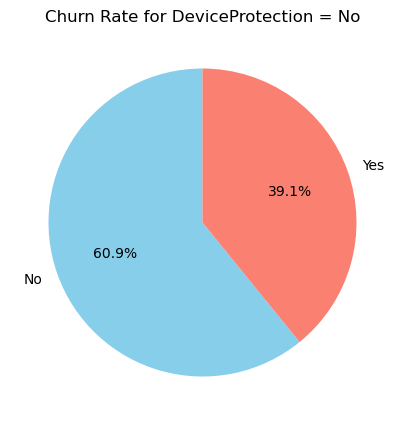

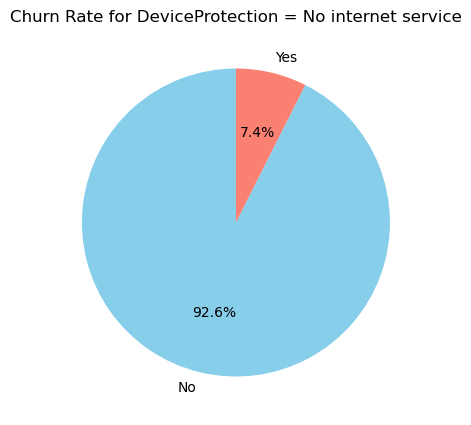

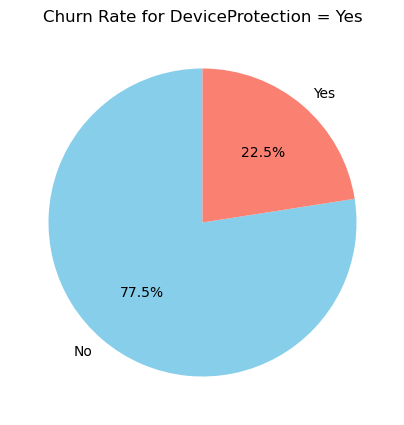


Feature: TechSupport
Value Counts:
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

Churn Rate per Category:
Churn                      No       Yes
TechSupport                            
No                   0.583525  0.416475
No internet service  0.925658  0.074342
Yes                  0.848039  0.151961


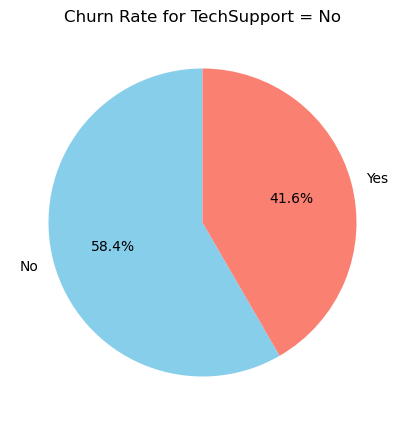

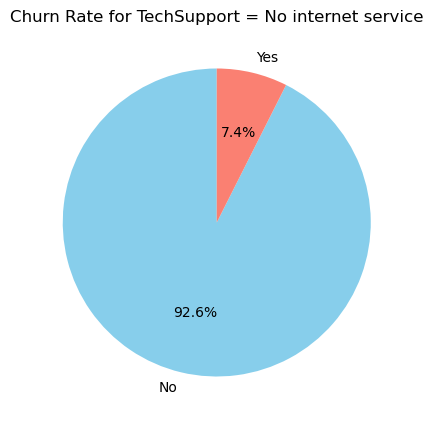

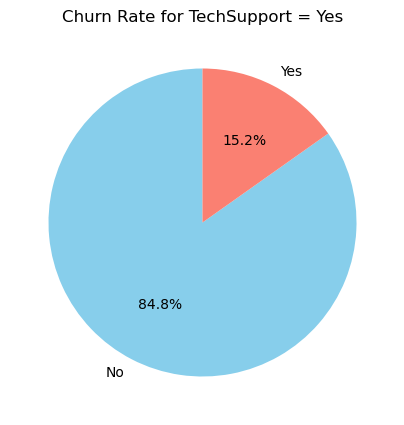


Feature: StreamingTV
Value Counts:
StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

Churn Rate per Category:
Churn                      No       Yes
StreamingTV                            
No                   0.664649  0.335351
No internet service  0.925658  0.074342
Yes                  0.698853  0.301147


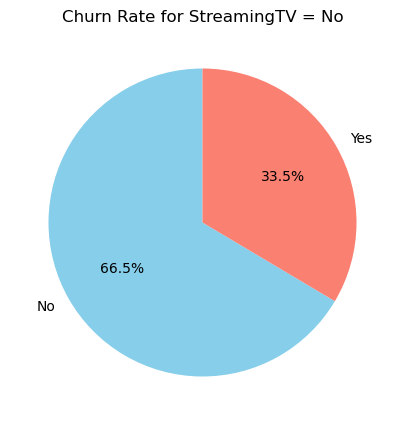

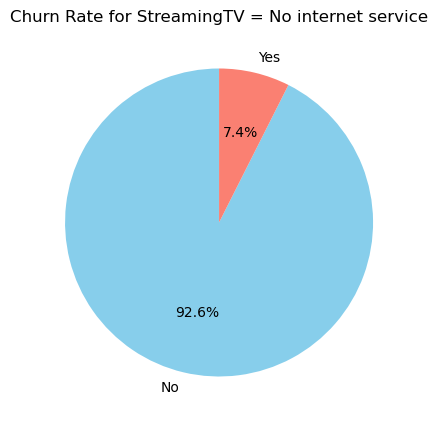

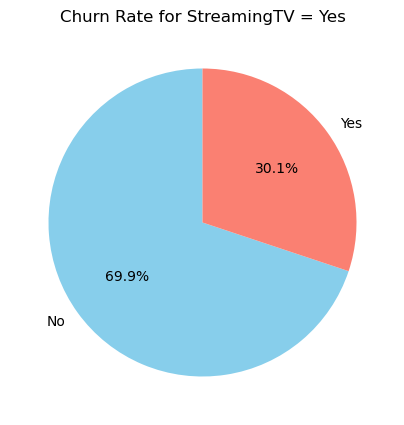


Feature: StreamingMovies
Value Counts:
StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

Churn Rate per Category:
Churn                      No       Yes
StreamingMovies                        
No                   0.662711  0.337289
No internet service  0.925658  0.074342
Yes                  0.700476  0.299524


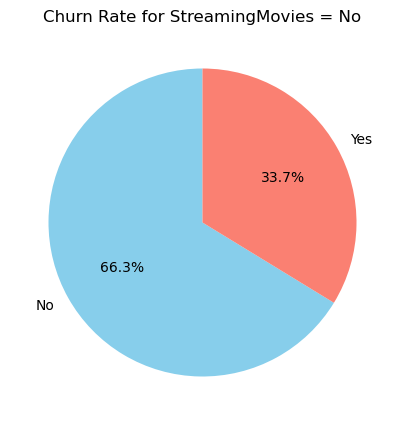

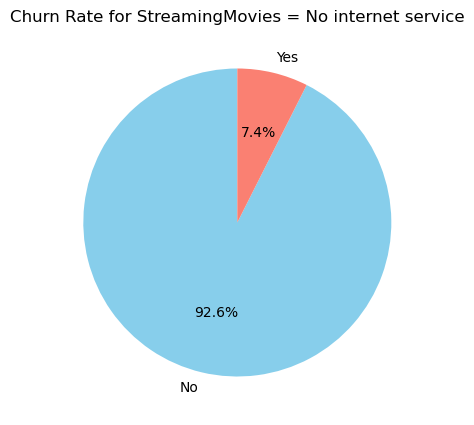

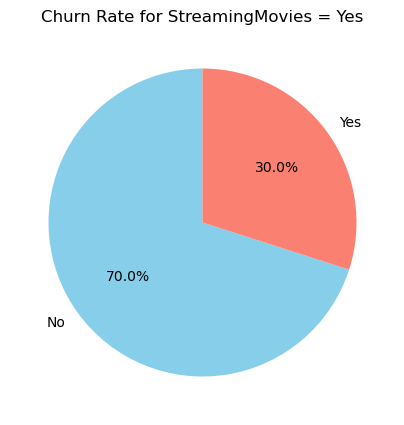


Feature: Contract
Value Counts:
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

Churn Rate per Category:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487


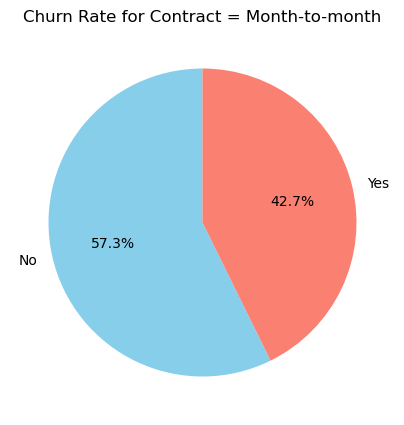

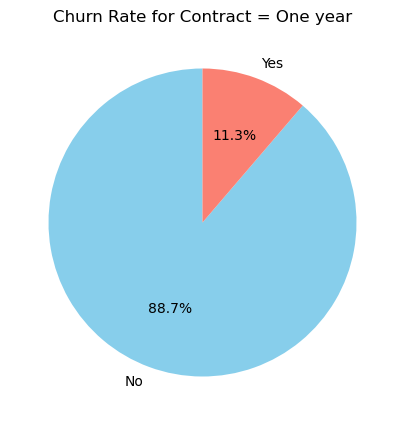

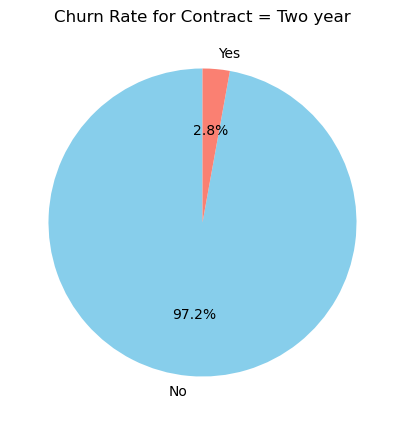


Feature: PaperlessBilling
Value Counts:
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64

Churn Rate per Category:
Churn                   No       Yes
PaperlessBilling                    
No                0.836243  0.163757
Yes               0.664107  0.335893


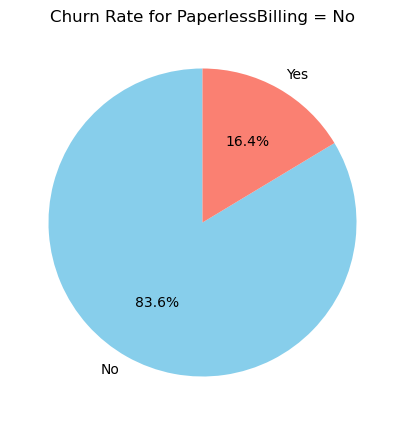

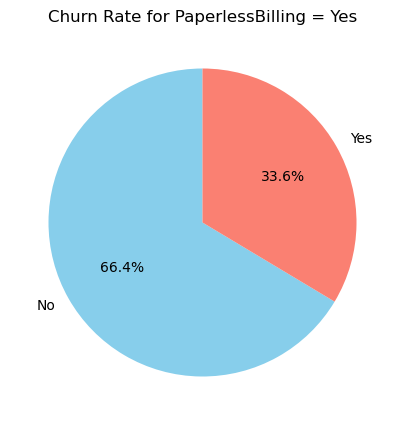


Feature: PaymentMethod
Value Counts:
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

Churn Rate per Category:
Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.547146  0.452854
Mailed check               0.807980  0.192020


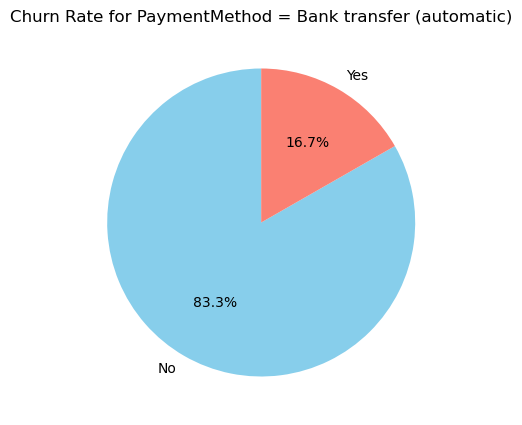

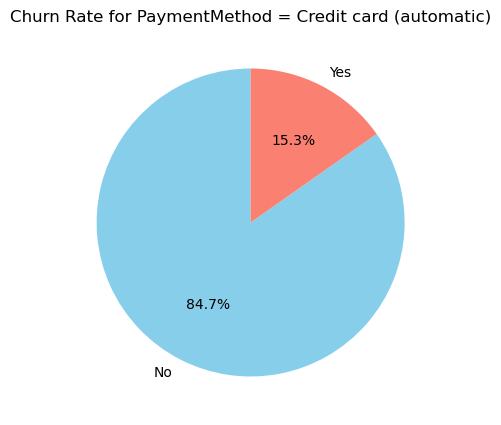

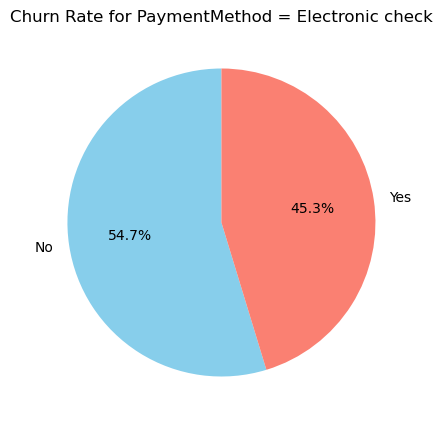

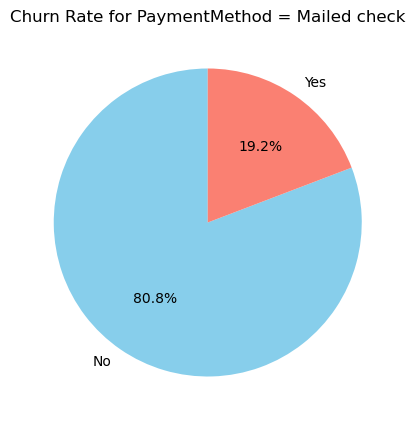

In [23]:
print("\nCategorical Features Frequency & Churn Relationship")
for col in categorical_features:
    print(f"\nFeature: {col}")
    print("Value Counts:")
    print(df[col].value_counts())
    
    ct = pd.crosstab(df[col], df['Churn'], normalize='index')
    print("\nChurn Rate per Category:")
    print(ct)

    for category in ct.index:
        plt.figure(figsize=(5,5))
        ct.loc[category].plot.pie(
            autopct='%1.1f%%',
            startangle=90,
            colors=['skyblue', 'salmon'],
            labels=ct.columns,
            legend=False,
            title=f'Churn Rate for {col} = {category}'
        )
        plt.ylabel('')
        plt.show()

# Bivariate Analysis

### Distribution of Churn by Demographic Features


Demographic Features Analysis


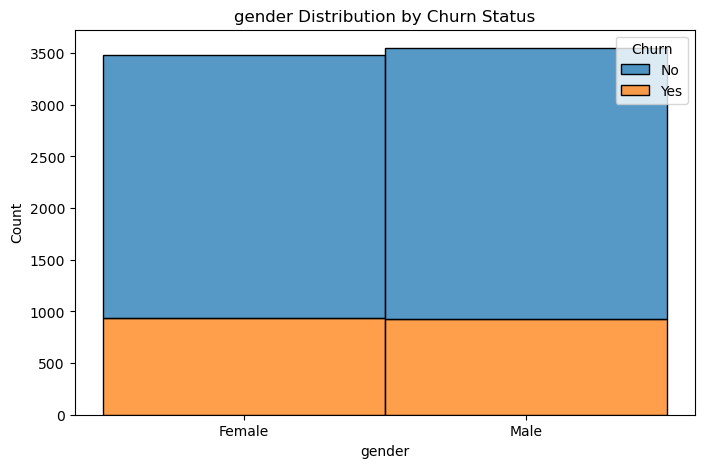

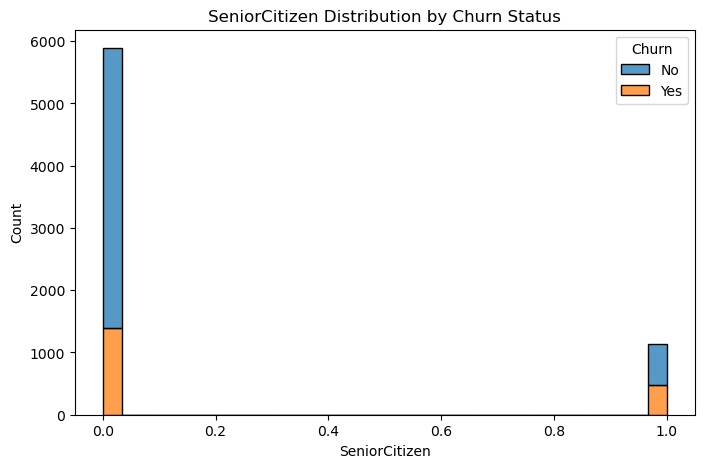

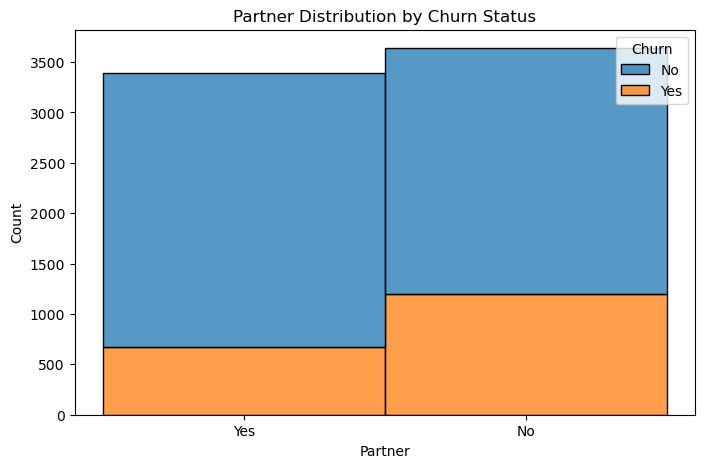

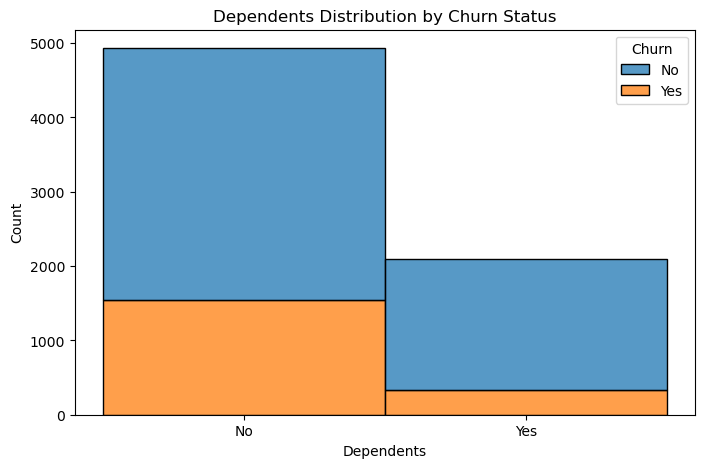

In [24]:
print("\nDemographic Features Analysis")
for col in demographic_features:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30)
    plt.title(f'{col} Distribution by Churn Status')
    plt.show()

### Distribution of Churn by Behavioral Features


Behavioral Features Analysis


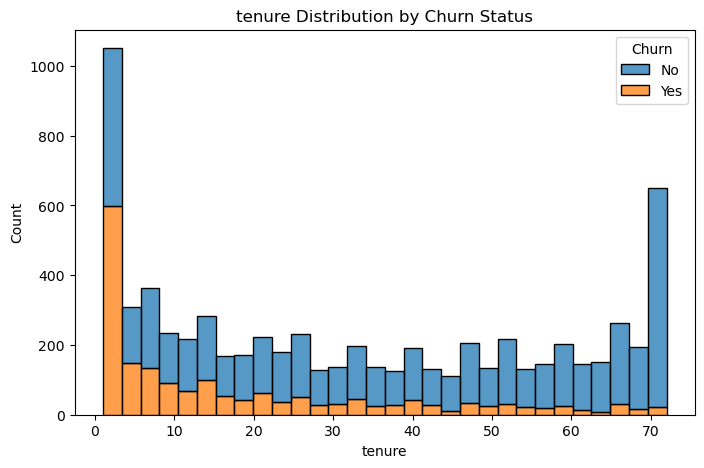

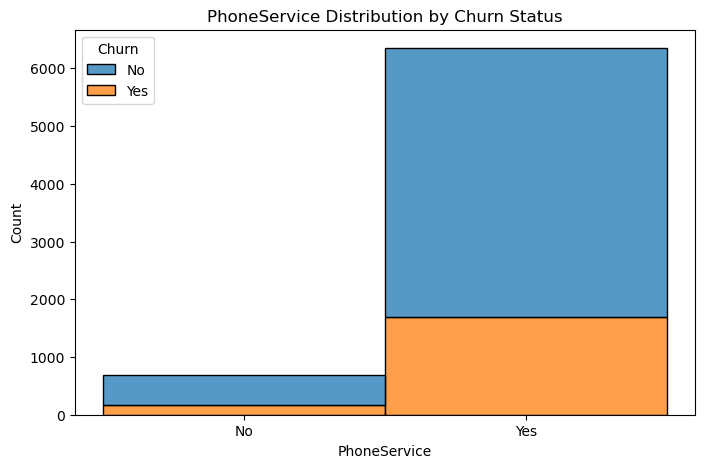

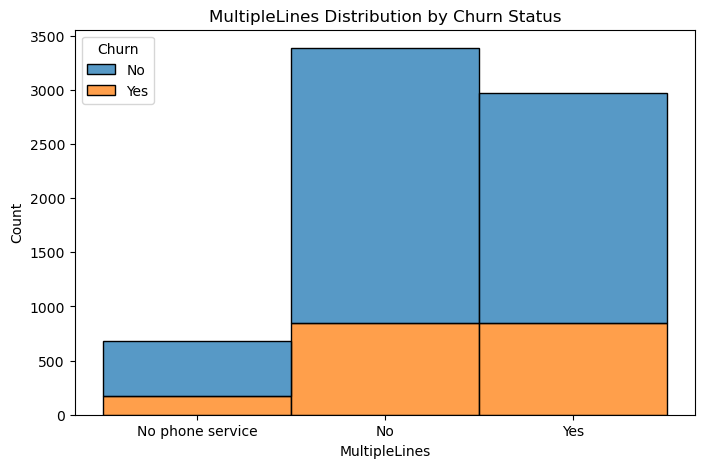

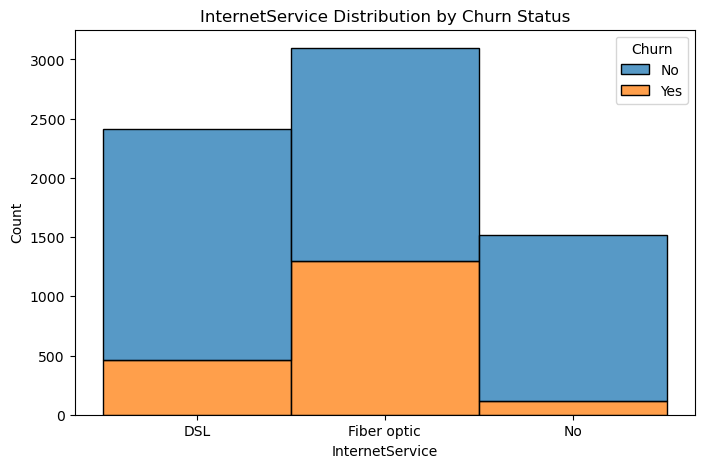

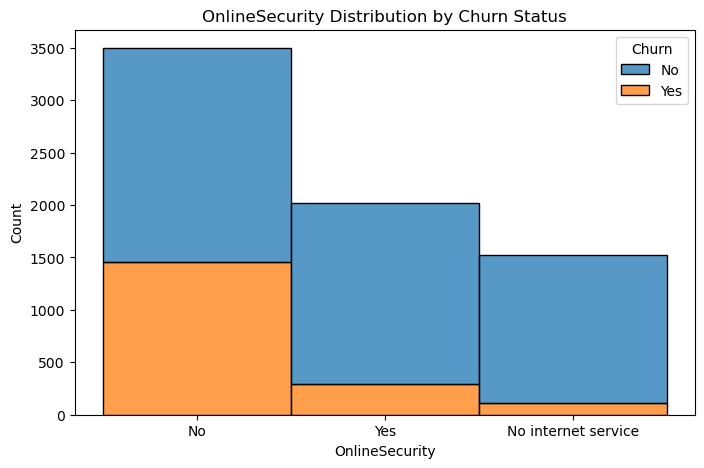

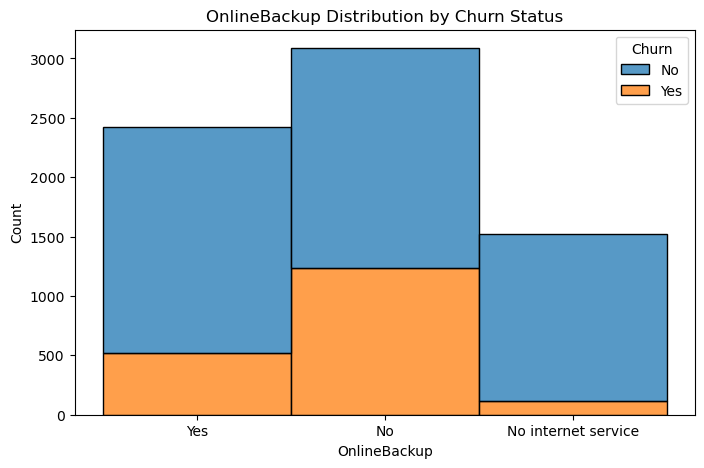

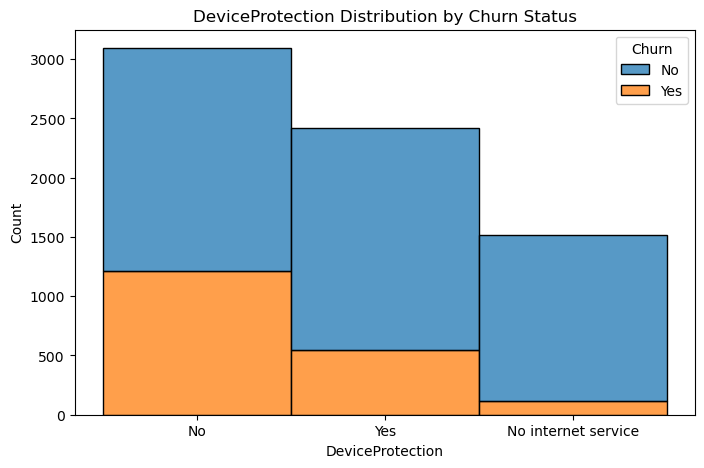

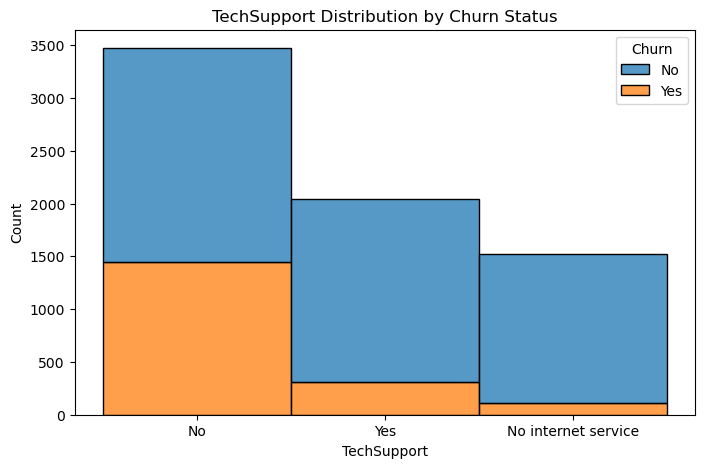

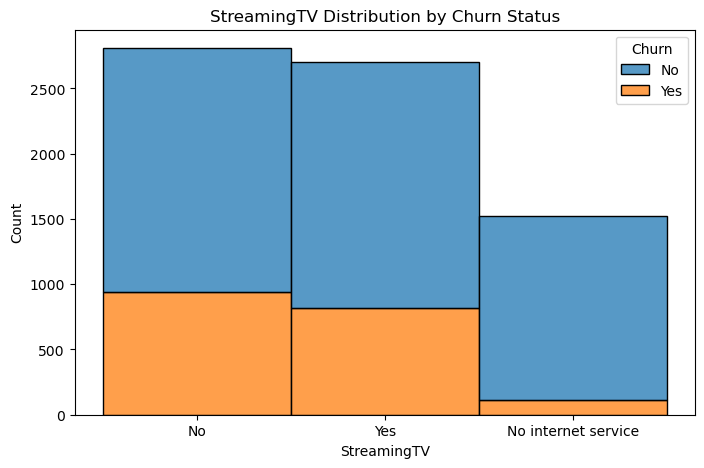

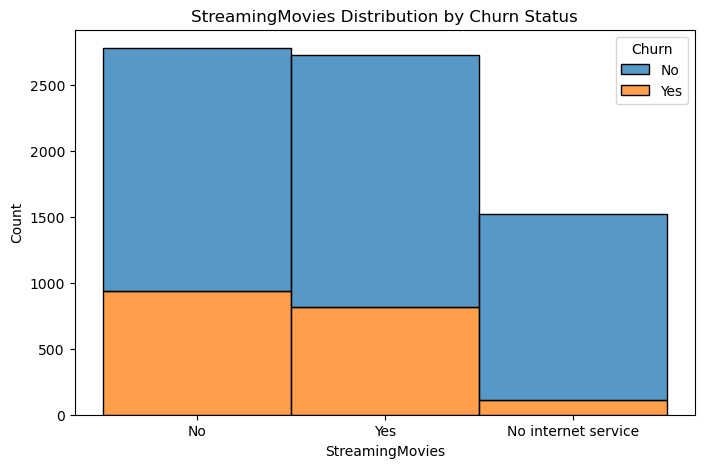

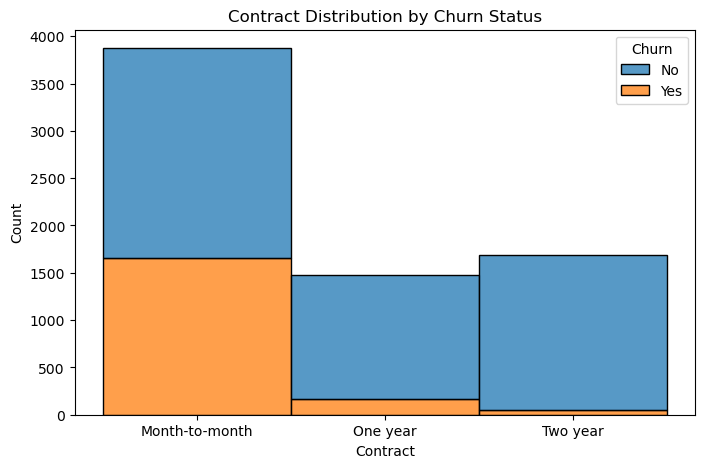

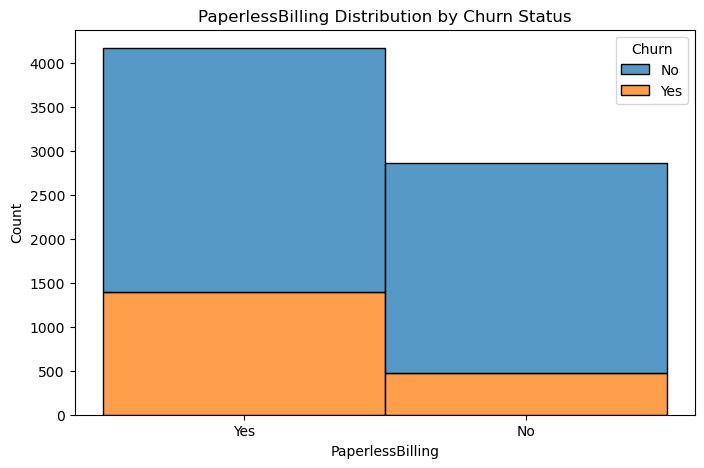

In [25]:
print("\nBehavioral Features Analysis")
for col in behavioral_features:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30)
    plt.title(f'{col} Distribution by Churn Status')
    plt.show()

### Distribution of Churn by Financial Features


Financial Features Analysis


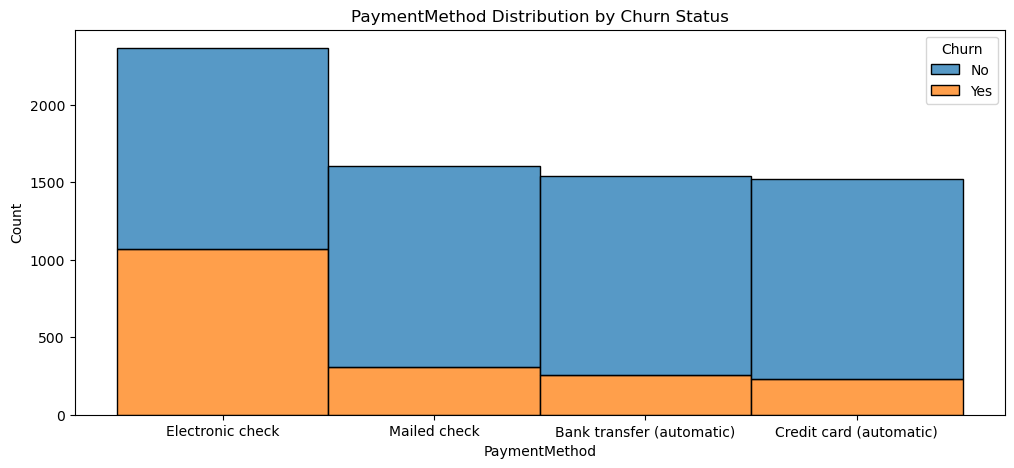

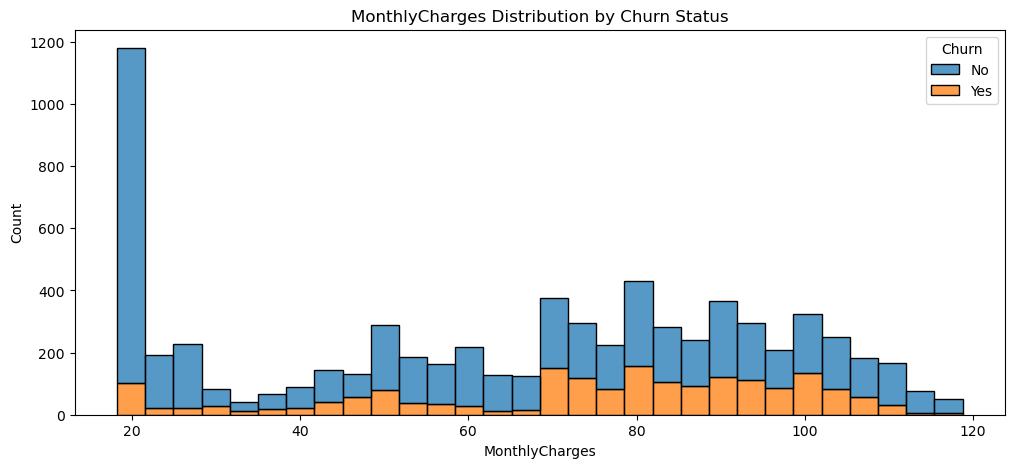

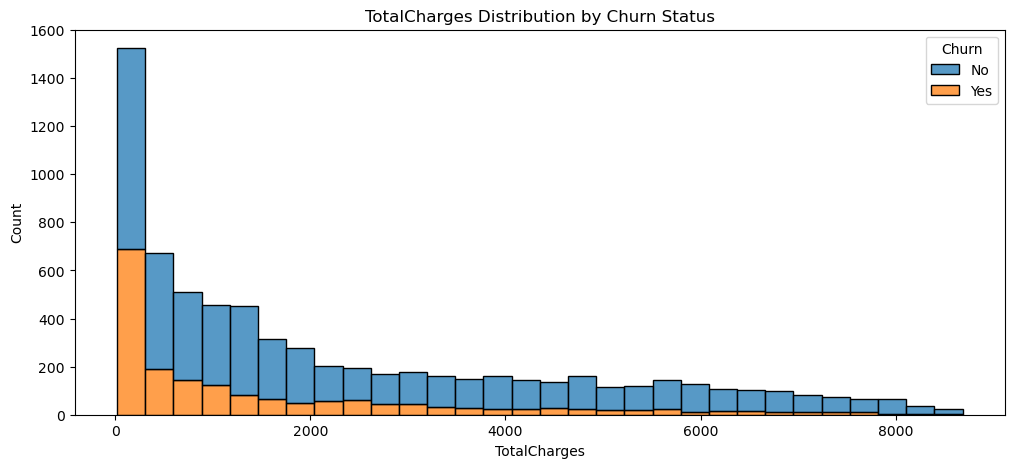

In [26]:
print("\nFinancial Features Analysis")
for col in financial_features:
    plt.figure(figsize=(12,5))
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30)
    plt.title(f'{col} Distribution by Churn Status')
    plt.show()

In [27]:
print("Bivariate Analysis: Categorical Features\n")
for col in categorical_features:
    print(f"\nChi-Squared Test for {col} vs Churn")
    contingency = pd.crosstab(df[col], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: Chi2 p-value = {p:.4f}")

Bivariate Analysis: Categorical Features


Chi-Squared Test for gender vs Churn
gender: Chi2 p-value = 0.4905

Chi-Squared Test for SeniorCitizen vs Churn
SeniorCitizen: Chi2 p-value = 0.0000

Chi-Squared Test for Partner vs Churn
Partner: Chi2 p-value = 0.0000

Chi-Squared Test for Dependents vs Churn
Dependents: Chi2 p-value = 0.0000

Chi-Squared Test for PhoneService vs Churn
PhoneService: Chi2 p-value = 0.3499

Chi-Squared Test for MultipleLines vs Churn
MultipleLines: Chi2 p-value = 0.0036

Chi-Squared Test for InternetService vs Churn
InternetService: Chi2 p-value = 0.0000

Chi-Squared Test for OnlineSecurity vs Churn
OnlineSecurity: Chi2 p-value = 0.0000

Chi-Squared Test for OnlineBackup vs Churn
OnlineBackup: Chi2 p-value = 0.0000

Chi-Squared Test for DeviceProtection vs Churn
DeviceProtection: Chi2 p-value = 0.0000

Chi-Squared Test for TechSupport vs Churn
TechSupport: Chi2 p-value = 0.0000

Chi-Squared Test for StreamingTV vs Churn
StreamingTV: Chi2 p-value = 0.0000

Chi-S

## Bivariate Numerical Analysis

Bivariate Analysis: Numerical Features



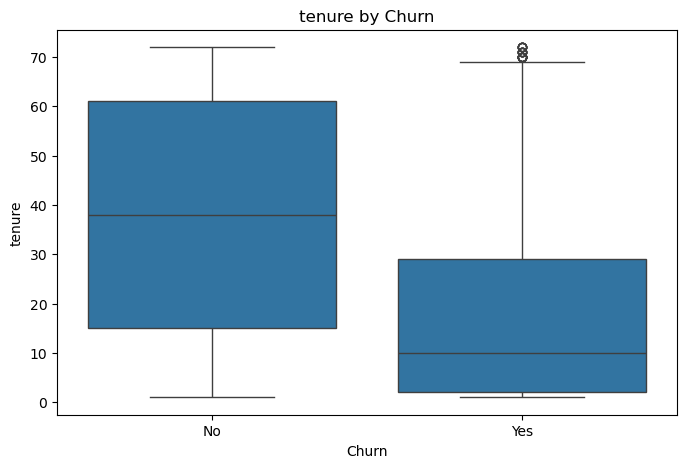

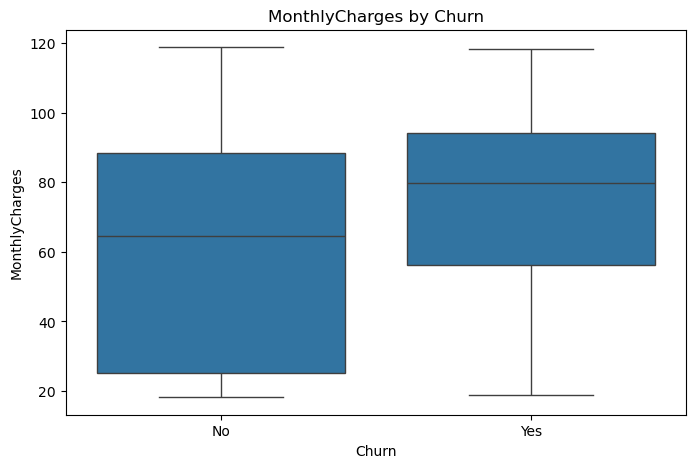

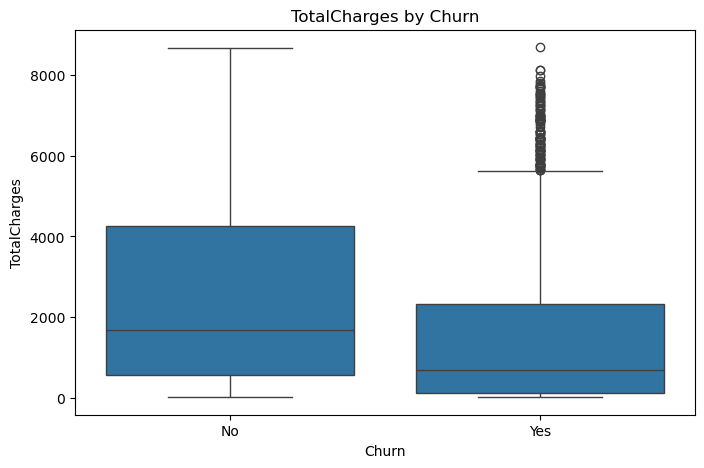

In [28]:
print("Bivariate Analysis: Numerical Features\n")
for col in numerical_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} by Churn')
    plt.show()


Bivariate Analysis: Services and Churn


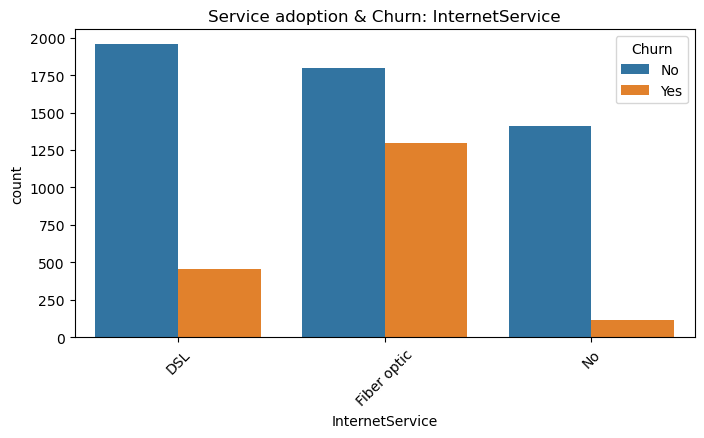

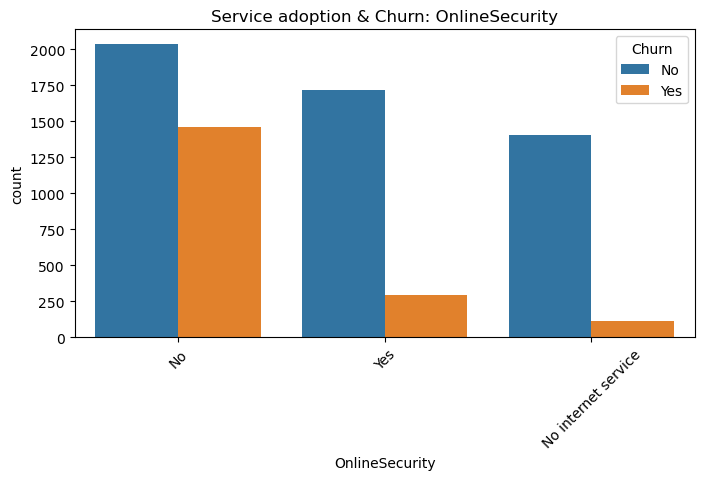

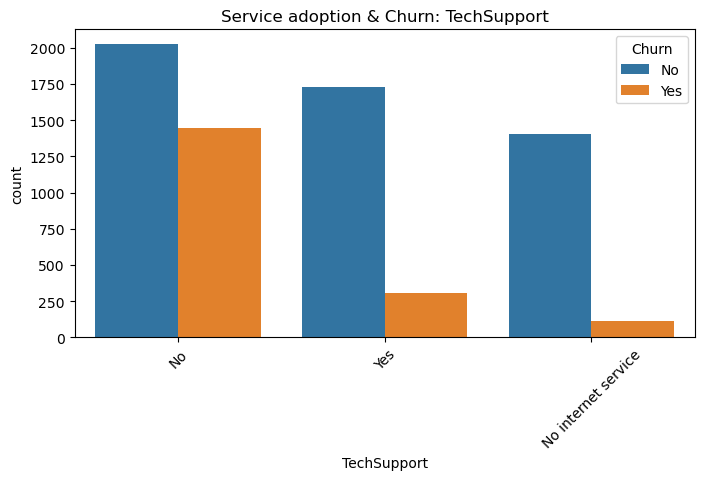

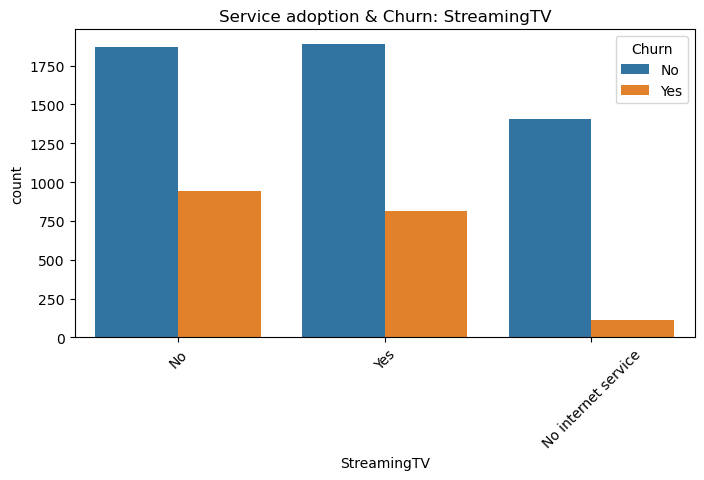

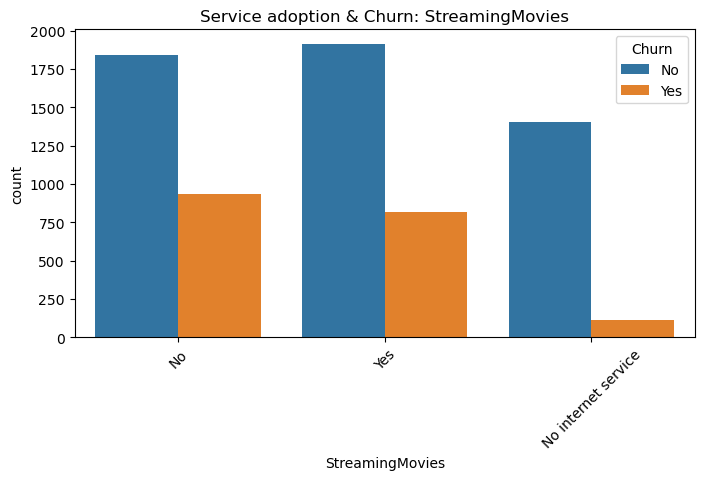

In [29]:
print("\nBivariate Analysis: Services and Churn")
for col in service_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Service adoption & Churn: {col}')
    plt.xticks(rotation=45)
    plt.show()

In [30]:
print("Bivariate Analysis: Numerical Features\n")
for col in numerical_features:    
    churn_yes = df[df['Churn'] == 'Yes'][col].dropna()
    churn_no = df[df['Churn'] == 'No'][col].dropna()
    t_stat, p_val = ttest_ind(churn_yes, churn_no, equal_var=False)
    print(f"{col}: t-test p-value = {p_val:.4f}")

Bivariate Analysis: Numerical Features

tenure: t-test p-value = 0.0000
MonthlyCharges: t-test p-value = 0.0000
TotalCharges: t-test p-value = 0.0000


# Multivariate Analysis

In [31]:
ordinal_features = ['Contract']

nominal_features = [
    'gender', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'PaymentMethod', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService'
]

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

other_features = ['SeniorCitizen']

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ordinal_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

### Encode Target Variable
Churn --> 1 <br>
Non Churn --> 0

In [33]:
df_encoded = df.copy()
df_encoded['Churn'] = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Encode Ordinal Variables

In [34]:
df_encoded['Contract'] = ordinal_encoder.fit_transform(df_encoded['Contract'])
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,1


### Encode Nominal Variables

In [35]:
# df_encoded = pd.get_dummies(df_encoded, columns=nominal_features)
# df_encoded.head()

In [36]:
df_encoded = pd.get_dummies(df_encoded, columns=nominal_features, drop_first=True)
df_encoded.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PhoneService_Yes
0,0,1,0,29.85,29.85,0,False,False,True,False,...,False,False,False,False,True,False,True,False,True,False
1,0,34,1,56.95,1889.50,0,True,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2,0,2,0,53.85,108.15,1,True,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,1,42.30,1840.75,0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,0,70.70,151.65,1,False,True,False,False,...,False,False,False,False,True,False,False,False,True,True


In [37]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   Contract                               7032 non-null   int32  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   int64  
 6   gender_Male                            7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

In [38]:
df_churn = df_encoded['Churn']
df_encoded = df_encoded.drop(columns=['Churn'])

df_encoded = pd.concat([df_encoded, df_churn], axis=1)
df_encoded.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PhoneService_Yes,Churn
0,0,1,0,29.85,29.85,False,False,True,False,False,...,False,False,False,True,False,True,False,True,False,0
1,0,34,1,56.95,1889.50,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,0
2,0,2,0,53.85,108.15,True,True,False,False,False,...,False,False,False,False,True,False,False,True,True,1
3,0,45,1,42.30,1840.75,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0
4,0,2,0,70.70,151.65,False,True,False,False,True,...,False,False,False,True,False,False,False,True,True,1


### Save The Encoded Dataset

In [39]:
pd.DataFrame(df_encoded).to_csv('../data/processed/Telco_Customer_Churn_Encoded.csv', index=False)

## Correlation Matrix

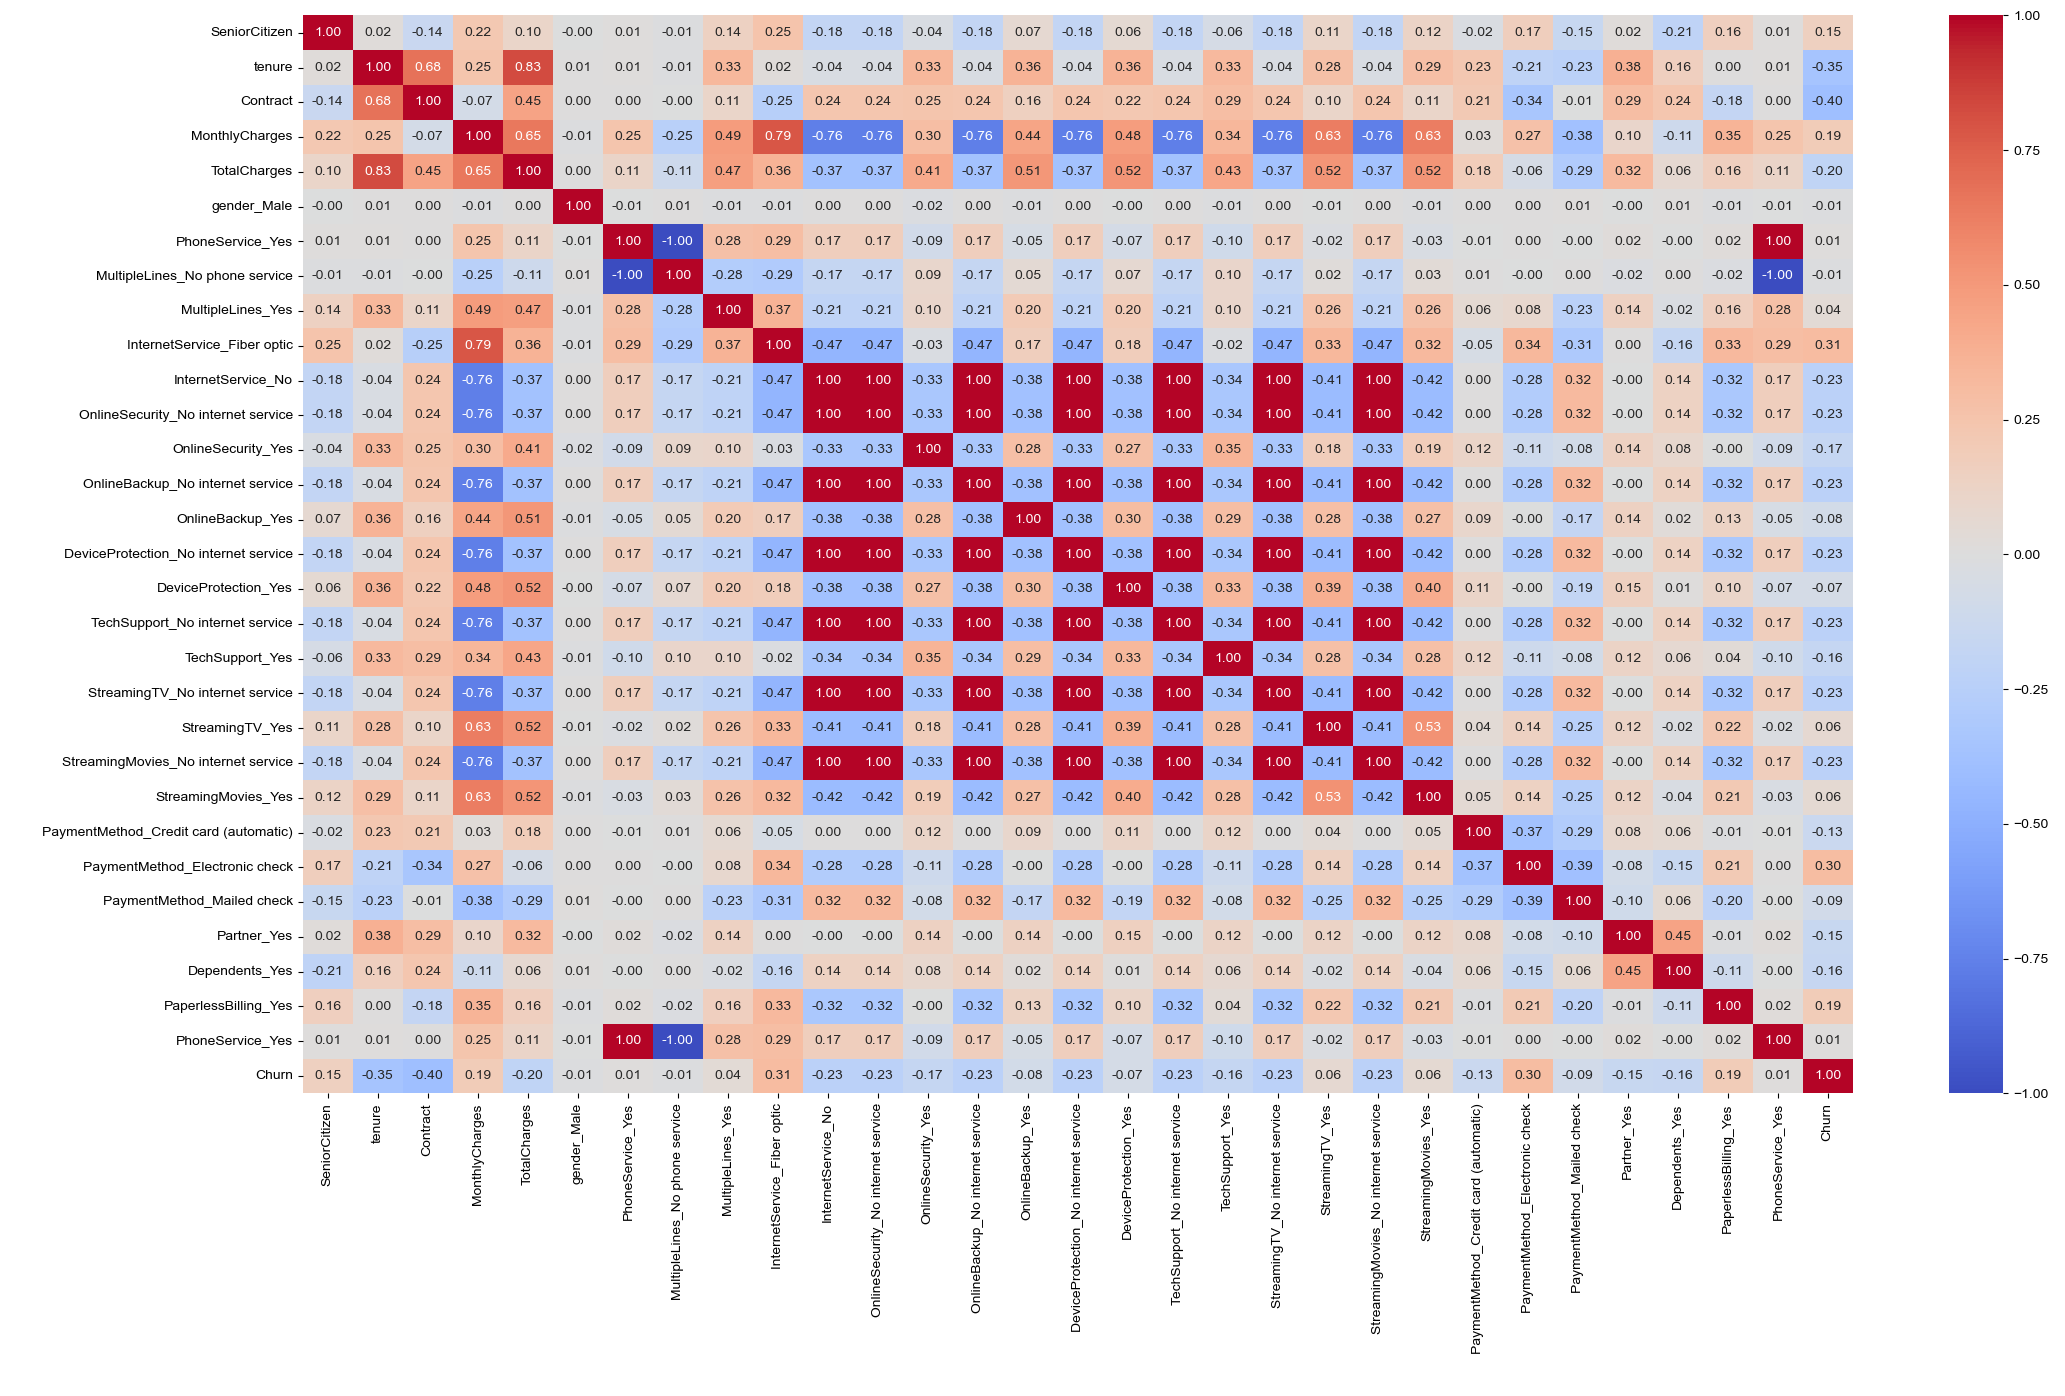

In [40]:
df_encoded.corr()

plt.figure(figsize=(25, 14))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
sns.set(font_scale=1.2)

# Revenue Impact Analysis

In [41]:
df_churned_customers = df[df['Churn'] == 'Yes']

# Historical revenue loss
historical_loss = df_churned_customers['TotalCharges'].sum()

# Annualized projected loss (assuming 12 months more retention)
projected_loss_12m = (df_churned_customers['MonthlyCharges'] * 12).sum()

print(f"Historical Revenue Loss from churners: ${historical_loss:,.2f}")
print(f"Projected 12-month Revenue Loss: ${projected_loss_12m:,.2f}")
print(f"Potential Savings from 10% Churn Reduction: ${projected_loss_12m * 0.10:,.2f}")

Historical Revenue Loss from churners: $2,862,926.90
Projected 12-month Revenue Loss: $1,669,570.20
Potential Savings from 10% Churn Reduction: $166,957.02


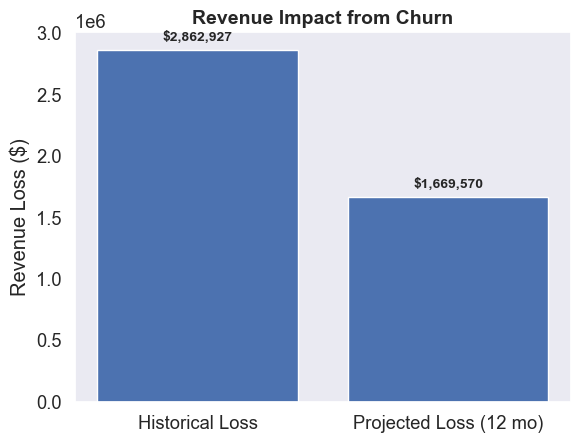

In [42]:
bars = plt.bar(
    ["Historical Loss", "Projected Loss (12 mo)"],
    [historical_loss, projected_loss_12m]
)
plt.ylabel("Revenue Loss ($)")
plt.title("Revenue Impact from Churn", fontsize=14, fontweight='bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50000, f"${yval:,.0f}", 
            ha="center", va="bottom", fontsize=10, fontweight="bold")
    plt.grid(False)

plt.show()

# Exploratory Data Analysis Interpretation

## 1. Dataset Overview
This dataset contains customer demographic details, account information, and service usage patterns from a teleco context.  
The goal of the EDA is to understand feature relationships with churn and identify variables with potential predictive power.

**Main Feature Categories:**
- **Demographics**: `SeniorCitizen`, `gender`, `Partner`, `Dependents`
- **Account Information**: `tenure`, `Contract`, `PaymentMethod`, `PaperlessBilling`
- **Services**: `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`
- **Charges**: `MonthlyCharges`, `TotalCharges`

---

## 2. Correlation Matrix Summary
The correlation matrix helps detect linear relationships between numerical and one-hot-encoded categorical variables.

**Key Observations:**
- **SeniorCitizen** has weak correlations with most variables (~0.15), suggesting minimal direct linear influence.
- **tenure**:
  - Negatively correlated (~-0.23) with churn likelihood (customers with longer tenure churn less).
  - Positively correlated (~0.35–0.40) with contract length, as expected.
- **MonthlyCharges** and **TotalCharges** are strongly correlated (~0.75+), which is expected since TotalCharges ≈ MonthlyCharges × tenure.
- **InternetService_Fiber optic** is associated with higher monthly charges.
- Add-on services (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`) are positively correlated, indicating possible service bundling.
- **StreamingTV** and **StreamingMovies** show moderate positive correlation (~0.25–0.50), suggesting similar subscription patterns.
- **PaymentMethod_Electronic check** shows moderate positive correlation with churn.

---

## 3. Categorical Features – Frequency & Churn Relationship

Analyzed churn distribution across categorical features and tested statistical significance using the **Chi-square test**.

| Feature            | Churn Observation                                           | Chi-square p-value | Significant? (α=0.05) |
|--------------------|-------------------------------------------------------------|--------------------|-----------------------|
| **Gender**         | Nearly identical churn (~27% Female, ~26% Male)             | 0.4866             |  No                  |
| **SeniorCitizen**  | Seniors churn more (~42% vs ~24% non-seniors)               | 0.0000             |  Yes                 |
| **Partner**        | No partner churns more (~33% vs ~20%)                       | 0.0000             |  Yes                 |
| **Dependents**     | No dependents churn more (~31% vs ~15%)                     | 0.0000             |  Yes                 |
| **PhoneService**   | Minimal difference (~25–27%)                                | 0.3388             |  No                  |
| **MultipleLines**  | Slightly higher churn for multiple lines (~29% vs 25%)      | 0.0035             |  Yes                 |
| **InternetService**| Fiber optic churn highest (~42%), ‘No internet’ lowest (~7%)| 0.0000             |  Strong              |
| **OnlineSecurity** | No security churn ~42%, with security ~15%                  | 0.0000             |  Strong              |
| **OnlineBackup**   | No backup churn ~40%, with backup ~21%                      | 0.0000             |  Yes                 |
| **DeviceProtection**| No protection churn ~39%, with protection ~22%             | 0.0000             |  Yes                 |
| **TechSupport**    | No support churn ~42%, with support ~15%                    | 0.0000             |  Strong              |
| **StreamingTV**    | Slight difference (~33% vs ~30%)                            | 0.0000             |  Yes                 |
| **StreamingMovies**| Slight difference (~34% vs ~30%)                            | 0.0000             |  Yes                 |
| **Contract**       | Month-to-month churn ~43%, two-year only ~3%                | 0.0000             |  Strong              |
| **PaperlessBilling**| Paperless churn ~33%, non-paperless ~16%                    | 0.0000             | Yes                 |
| **PaymentMethod**  | Electronic check churn ~45%, bank transfer ~17%             | 0.0000             |  Yes                 |

---

## 4. Numerical Features – Bivariate Analysis

- **Tenure**: Churners tend to have shorter tenures.
- **MonthlyCharges**: Higher charges are associated with higher churn probability.
- **TotalCharges**: Churners often have lower total charges (due to shorter tenure).

---

## 5. Key Insights & Recommendations

**Strong churn predictors**:
- `SeniorCitizen`, `Partner`, `Dependents`, `MultipleLines`
- `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`
- `Contract`, `PaperlessBilling`, `PaymentMethod`
- `tenure`, `MonthlyCharges`, `TotalCharges`

**Weak/No relationship**:
- `Gender`, `PhoneService`

**Business Actions**:
- Incentivize **long-term contracts** to reduce churn.
- Target **month-to-month**, **fiber optic**, and **electronic check** customers with retention offers.
- Bundle **security and backup services** to improve retention.
- Offer loyalty discounts to **high monthly charge** customers.

**Modeling Notes**:
- Handle **multicollinearity** between `MonthlyCharges` and `TotalCharges`.
- Consider **tenure bins** and “number of add-on services” as engineered features.
- Exclude low-significance variables or use them cautiously.

---
## 6. Revenue Impact from Churn

- **Historical Revenue Loss**: **$2,862,926.90**
  This is the **total amount already lost** from churned customers, based on their total past payments.

- **Projected 12-Month Revenue Loss**: **$1,669,570.20** 
  This is the **expected loss for the next 12 months** if churn patterns continue, based on current monthly charges.

### Business Implications:
- Historical loss is **irrecoverable**; it shows the scale of past churn impact.
- Projected loss is **preventable**; lowering churn by just 10% could save **$166,957.02 per year**.
- Use these figures to guide **retention budget decisions**.
---